In [1]:
import numpy as np
import pandas as pd
from pyts.datasets import make_cylinder_bell_funnel

In [2]:
from sklearn.cluster import KMeans

def to_sts_matrix(ts: np.array, w: int):
    shape = ts.shape[:-1] + (ts.shape[-1] - w + 1, w)
    strides = ts.strides + (ts.strides[-1],)
    return np.lib.stride_tricks.as_strided(ts, shape=shape, strides=strides)

In [3]:
def create_concatenated_cbf_ts(tss: np.array) -> np.array:
    """

    :param tss: cbf timeseries (shape: [3*n,128])
    :return: concatenated cbf timeseries (shape: [3*n*128])
    """
    return np.ravel(tss)


### Cylinder, Bell & Funnel dataset

In [7]:
n=30
k=3
w=128
idx_centers=np.arange(0,w)

cbf,_ = make_cylinder_bell_funnel(n_samples=3*n)

# cbf_df = pd.DataFrame(cbf.T)
# cbf_df.to_csv(r'..\data\cbf.csv')

<AxesSubplot:>

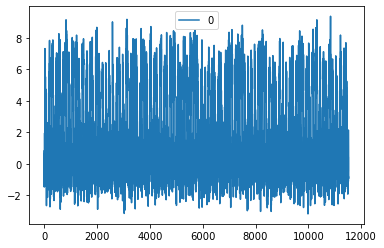

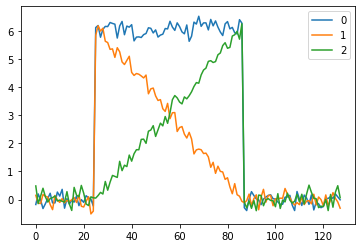

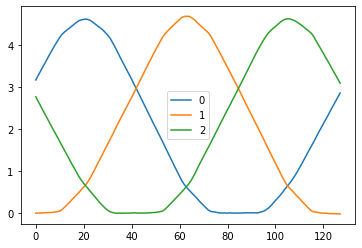

In [9]:
cbf_concat = create_concatenated_cbf_ts(cbf)
cbf_sts = to_sts_matrix(cbf_concat,w)

whole_centers = KMeans(n_clusters=k).fit(cbf).cluster_centers_
sts_centers = KMeans(n_clusters=k).fit(cbf_sts).cluster_centers_

# cbf_concat_df = pd.DataFrame(cbf_concat,np.arange(0,n*k*w))
# cbf_concat_df.plot()
whole_df = pd.DataFrame(whole_centers.T,idx_centers)
sts_df = pd.DataFrame(sts_centers.T,idx_centers)
whole_df.plot()
sts_df.plot()
